## Transfer Learning DenseNet using Keras

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.3.0


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications import DenseNet121
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
den = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in den.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(den.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=den.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [15]:
from keras.callbacks import ModelCheckpoint

filepath = "DenseNet121_20ep-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
163/163 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.9243
Epoch 00001: val_accuracy improved from -inf to 0.88782, saving model to DenseNet121_20ep-01-0.89.hdf5
163/163 [==============================] - 84s 518ms/step - loss: 0.5932 - accuracy: 0.9243 - val_loss: 0.9227 - val_accuracy: 0.8878
Epoch 2/20
163/163 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.9488
Epoch 00002: val_accuracy did not improve from 0.88782
163/163 [==============================] - 76s 467ms/step - loss: 0.3790 - accuracy: 0.9488 - val_loss: 2.2507 - val_accuracy: 0.7933
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.9594
Epoch 00003: val_accuracy improved from 0.88782 to 0.90865, saving model to DenseNet121_20ep-03-0.91.hdf5
163/163 [==============================] - 77s 470ms/step - loss: 0.2663 - accuracy: 0.9594 - val_loss: 

In [17]:
r.history

{'loss': [0.5931745767593384,
  0.37903234362602234,
  0.2662706971168518,
  0.41614606976509094,
  0.5008975863456726,
  0.36020994186401367,
  0.3504806458950043,
  0.3547925055027008,
  0.33986446261405945,
  0.4212658107280731,
  0.3444204330444336,
  0.38352879881858826,
  0.3783923387527466,
  0.321588397026062,
  0.29382723569869995,
  0.3471079468727112,
  0.3479793071746826,
  0.33702409267425537,
  0.3366907835006714,
  0.49751126766204834],
 'accuracy': [0.9242714643478394,
  0.9488113522529602,
  0.9593558311462402,
  0.9518788456916809,
  0.9501533508300781,
  0.9652990698814392,
  0.9660659432411194,
  0.9654908180236816,
  0.9668328166007996,
  0.9601227045059204,
  0.9681748747825623,
  0.9677914381027222,
  0.9660659432411194,
  0.9714340567588806,
  0.9731594920158386,
  0.9716257452964783,
  0.9706671833992004,
  0.9731594920158386,
  0.9718174934387207,
  0.9595475196838379],
 'val_loss': [0.922714114189148,
  2.2507200241088867,
  0.8020405769348145,
  1.1340606212

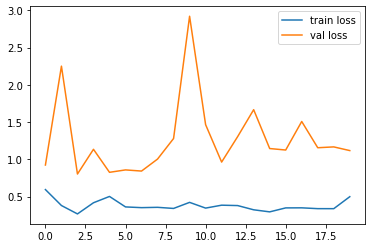

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

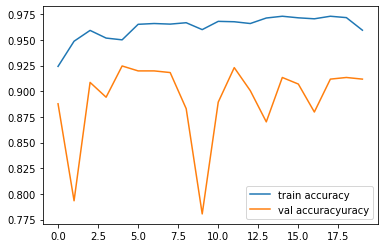

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracyuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [20]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_DenseNet121_20ep.h5')